# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

Massa water start: 473.10000000000014 g
Massa water eind: 454.10000000000014 g
Verdampt: 19.0 g


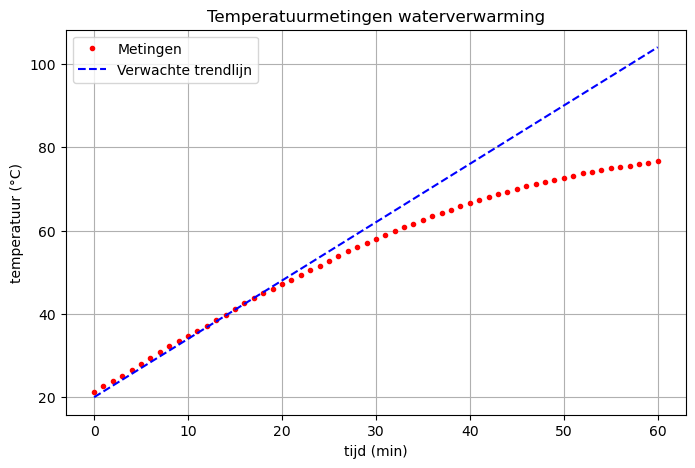

Trendlijn: T(t) = 0.942 t + 26.461
Massa water start: 473.1 g
Massa water eind: 454.1 g
Verdampt: 19.0 g
Temperatuur start: 21.2 °C
Temperatuur eind: 76.6 °C
Warmte voor opwarming: 109557 J
Warmte voor verdamping: 42940 J
Totale warmte-input: 152497 J


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
data=np.loadtxt("C:/Users/laura/OneDrive/universiteit/inleidend practicum 2/tempmetingen-733121424db047611d1756851296ade6.csv",delimiter=';',skiprows=1)
data=data.T
tijd=data[0]
temp=data[1]
m_maatbeker=820.8 #gram
m_maatbeker_en_water_s=1293.9 #gram
m_maatbeker_en_water_e=1274.9 #gram

m_water_start = m_maatbeker_en_water_s - m_maatbeker
m_water_eind = m_maatbeker_en_water_e - m_maatbeker

print("Massa water start:", m_water_start, "g")
print("Massa water eind:", m_water_eind, "g")
print("Verdampt:", m_water_start - m_water_eind, "g")

# Plot van de metingen
plt.figure(figsize=(8,5))
plt.plot(tijd, temp, 'r.', label='Metingen')

def funct(x,a):
    return a*x+20


a=(temp[1]-temp[0])/(tijd[1]-tijd[0])




popt, cov= curve_fit(funct,tijd,temp)
plt.plot(tijd, funct(tijd,a), 'b--', label='Verwachte trendlijn')

plt.xlabel('tijd (min)')
plt.ylabel('temperatuur (°C)')
plt.title('Temperatuurmetingen waterverwarming')
plt.grid(True)
plt.legend()
plt.show()

# Massa water berekenen
m_water_start = m_maatbeker_en_water_s - m_maatbeker
m_water_eind = m_maatbeker_en_water_e - m_maatbeker

# Constantes
c_water = 4180       # J/kg°C
Lv = 2.26e6          # J/kg

# Temperaturen uit data
T_start = temp[0]
T_eind = temp[-1]

# Massa in kg
m_start_kg = m_water_start / 1000
m_eind_kg = m_water_eind / 1000
m_evap_kg = m_start_kg - m_eind_kg

# Energie berekenen
Q_opw = m_start_kg * c_water * (T_eind - T_start)
Q_verdamping = m_evap_kg * Lv
Q_totaal = Q_opw + Q_verdamping

print(f"Massa water start: {m_water_start:.1f} g")
print(f"Massa water eind: {m_water_eind:.1f} g")
print(f"Verdampt: {m_evap_kg*1000:.1f} g")
print(f"Temperatuur start: {T_start:.1f} °C")
print(f"Temperatuur eind: {T_eind:.1f} °C")
print(f"Warmte voor opwarming: {Q_opw:.0f} J")
print(f"Warmte voor verdamping: {Q_verdamping:.0f} J")
print(f"Totale warmte-input: {Q_totaal:.0f} J")
